In [1]:
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix ,accuracy_score 

#importing datasets  
data= pd.read_csv('dataset.csv')  
  


In [2]:
data.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso,nginx,None,10-10-15 18:21,None,7,0,2,700,9,10,1153,832,9,2,1
1,B0_2314,16,6,utf,apache,None,None,None,17,7,4,1230,17,19,1265,1230,17,0,0
2,B0_911,16,6,ascii,microsoft,None,None,None,0,0,0,0,0,0,0,0,0,0,0
3,B0_113,17,6,iso,nginx,US,07-10-97 4:00,12-09-13 0:45,31,22,3,3812,39,37,18784,4380,39,8,0
4,B0_403,17,6,utf,None,US,12-05-96 0:00,11-04-17 0:00,57,2,5,4278,61,62,129889,4586,61,4,0


In [3]:
data['CHARSET'] = data['CHARSET'].replace(['None'],'Other')
data['SERVER'] = data['SERVER'].replace(['None'],'Other')
data['WHOIS_COUNTRY'] = data['WHOIS_COUNTRY'].replace(['None'],'Other')

data["CHARSET"] = data["CHARSET"].astype('category')
data["CHARSET_CAT"] = data["CHARSET"].cat.codes
data["SERVER"] = data["SERVER"].astype('category')
data["SERVER_CAT"] = data["SERVER"].cat.codes
data["WHOIS_COUNTRY"] = data["WHOIS_COUNTRY"].astype('category')
data["WHOIS_COUNTRY_CAT"] = data["WHOIS_COUNTRY"].cat.codes
data["Type"] = data["Type"].astype('category')
data["Type"] = data["Type"].cat.codes

data=data[["NUMBER_SPECIAL_CHARACTERS","CHARSET_CAT","SERVER_CAT","WHOIS_COUNTRY_CAT","TCP_CONVERSATION_EXCHANGE",
           "DIST_REMOTE_TCP_PORT","REMOTE_IPS","APP_BYTES","SOURCE_APP_PACKETS","REMOTE_APP_PACKETS",
           "SOURCE_APP_BYTES","REMOTE_APP_BYTES","APP_PACKETS","DNS_QUERY_TIMES","Type"]]

x= data.iloc[:, 0:-1].values  
y= data.iloc[:, -1].values  

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=42)  
   
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [4]:
data.head()

,NUMBER_SPECIAL_CHARACTERS,CHARSET_CAT,SERVER_CAT,WHOIS_COUNTRY_CAT,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,7,2,4,4,7,0,2,700,9,10,1153,832,9,2,1
1,6,3,2,4,17,7,4,1230,17,19,1265,1230,17,0,0
2,6,1,3,4,0,0,0,0,0,0,0,0,0,0,0
3,6,2,4,6,31,22,3,3812,39,37,18784,4380,39,8,0
4,6,3,0,6,57,2,5,4278,61,62,129889,4586,61,4,0


In [5]:
accuracies=[]

# RANDOM FOREST

In [6]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 100, criterion="entropy", max_depth=None, class_weight="balanced")  
classifier.fit(x_train, y_train) 
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)  
accRandomEntropy=accuracy_score(y_test, y_pred)
accRandomEntropy

0.9439775910364145

In [7]:
accuracies

[]

In [9]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 100, criterion="gini",max_depth=None, class_weight="balanced")  
classifier.fit(x_train, y_train) 
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)  
accRandomGini=accuracy_score(y_test, y_pred)
accuracies.append(accRandomGini)
print("Accuracy")
accRandomGini

Accuracy


0.9411764705882353

In [10]:
accuracies

[0.9411764705882353]

In [11]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import f1_score
classifier= RandomForestClassifier(n_estimators= 100, criterion="gini",max_depth=None, class_weight="balanced")  
classifier.fit(x_train, y_train) 
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)  
f1RandomGini = f1_score(y_test, y_pred)
print("F1-Score")
f1RandomGini

F1-Score


0.7857142857142858

In [12]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import recall_score
classifier= RandomForestClassifier(n_estimators= 100, criterion="gini",max_depth=None, class_weight="balanced")  
classifier.fit(x_train, y_train) 
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)  
recallRandomGini = recall_score(y_test, y_pred)
print("Recall")
recallRandomGini

Recall


0.6470588235294118

In [13]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import precision_score
classifier= RandomForestClassifier(n_estimators= 100, criterion="gini",max_depth=None, class_weight="balanced")  
classifier.fit(x_train, y_train) 
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)  
precisionRandomGini = precision_score(y_test, y_pred)
print("Precision")
precisionRandomGini

Precision


0.9393939393939394

# Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=None, splitter='best')  
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
accDTEntropy=accuracy_score(y_test, y_pred)
#accuracies.append(accDTEntropy)
accDTEntropy

0.927170868347339

In [15]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=None, splitter='random')  
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
accDTGini=accuracy_score(y_test, y_pred)
accuracies.append(accDTGini)
print("Accuracy")
accDTGini

Accuracy


0.9299719887955182

In [16]:
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import f1_score
classifier= DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=None, splitter='random')  
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
f1DTGini=f1_score(y_test, y_pred)
print("F1-Score")
f1DTGini

F1-Score


0.766355140186916

In [17]:
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import recall_score
classifier= DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=None, splitter='random')  
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
recallDTGini=recall_score(y_test, y_pred)
print("Recall")
recallDTGini

Recall


0.803921568627451

In [18]:
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import precision_score
classifier= DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=None, splitter='random')  
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
precisionDTGini=precision_score(y_test, y_pred)
print("Precision")
precisionDTGini

Precision


0.7321428571428571

# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0,multi_class='ovr')  
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
accLROvr=accuracy_score(y_test, y_pred)
accuracies.append(accLROvr)
print("Accuracy")
accLROvr

Accuracy


0.876750700280112

In [20]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import recall_score
classifier= LogisticRegression(random_state=0,multi_class='ovr')  
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
RecallLROvr=recall_score(y_test, y_pred)
print("Recall")
RecallLROvr

Recall


0.27450980392156865

In [21]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import precision_score
classifier= LogisticRegression(random_state=0,multi_class='ovr')  
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
PrecisionLROvr=precision_score(y_test, y_pred)
print("Precision")
PrecisionLROvr

Precision


0.6666666666666666

In [22]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import f1_score
classifier= LogisticRegression(random_state=0,multi_class='ovr')  
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
f1LROvr=f1_score(y_test, y_pred)
print("F1-SCore")
f1LROvr

F1-SCore


0.38888888888888895

In [23]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0,multi_class='multinomial')  
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
accLRMulti=accuracy_score(y_test, y_pred)
#accuracies.append(accLRMulti)
accLRMulti

0.8739495798319328

# Stochastic Gradient Descent

In [25]:
from sklearn.linear_model import SGDClassifier
classifier=SGDClassifier(loss="hinge", penalty="l1", max_iter=1000)
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
accSGDHingel1=f1_score(y_test, y_pred)
accuracies.append(accSGDHingel1)
print("Accuracy")
accSGDHingel1

Accuracy


0.6236559139784946

In [26]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
classifier=SGDClassifier(loss="hinge", penalty="l1", max_iter=1000)
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
f1SGDHingel1=f1_score(y_test, y_pred)
print("F1-Score")
f1SGDHingel1

F1-Score


0.6086956521739131

In [27]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score
classifier=SGDClassifier(loss="hinge", penalty="l1", max_iter=1000)
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
precisionSGDHingel1=precision_score(y_test, y_pred)
print("Precision")
precisionSGDHingel1

Precision


0.6829268292682927

In [28]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import recall_score
classifier=SGDClassifier(loss="hinge", penalty="l1", max_iter=1000)
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
recallSGDHingel1=recall_score(y_test, y_pred)
print("Recall")
recallSGDHingel1

Recall


0.27450980392156865

In [29]:
from sklearn.linear_model import SGDClassifier
classifier=SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
accSGDHingel2=accuracy_score(y_test, y_pred)
#accuracies.append(accSGDHingel2)
accSGDHingel2

0.8823529411764706

In [30]:
from sklearn.linear_model import SGDClassifier
classifier=SGDClassifier(loss="squared_hinge", penalty="l2", max_iter=1000)
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
accSGD=accuracy_score(y_test, y_pred)
#accuracies.append(accSGD)
accSGD

0.8543417366946778

In [31]:
from sklearn.linear_model import SGDClassifier
classifier=SGDClassifier(loss="squared_hinge", penalty="l2", max_iter=1000)
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
accSGDSHingel2=accuracy_score(y_test, y_pred)
#accuracies.append(accSGDSHingel2)
accSGDSHingel2

0.8067226890756303

In [32]:
from sklearn.linear_model import SGDClassifier
classifier=SGDClassifier(loss="squared_hinge", penalty="l1", max_iter=1000)
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
accSGDSHingel1=accuracy_score(y_test, y_pred)
#accuracies.append(accSGDSHingel1)
accSGDSHingel1

0.8935574229691877

# Naïve Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
accNAIVE=accuracy_score(y_test, y_pred)
accuracies.append(accNAIVE)
print("Accuracy")
accNAIVE

Accuracy


0.3137254901960784

In [34]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import f1_score
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
f1NAIVE=f1_score(y_test, y_pred)
print("F1-Score")
f1NAIVE

F1-Score


0.2898550724637681

In [35]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import recall_score
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
recallNAIVE=recall_score(y_test, y_pred)
print("Recall")
recallNAIVE

Recall


0.9803921568627451

In [36]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import precision_score
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
precisionNAIVE=precision_score(y_test, y_pred)
print("Precision")
precisionNAIVE

Precision


0.17006802721088435

# Support Vector Machine

In [37]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
accSVMLinear=accuracy_score(y_test, y_pred)
#accuracies.append(accSVMLinear)
accSVMLinear

0.8571428571428571

In [38]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='poly', random_state=0)  
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
accSVMPoly=accuracy_score(y_test, y_pred)
accuracies.append(accSVMPoly)
print("Accuracy")
accSVMPoly

Accuracy


0.8991596638655462

In [39]:
from sklearn.svm import SVC # "Support vector classifier"  
from sklearn.metrics import f1_score
classifier = SVC(kernel='poly', random_state=0)  
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
f1SVMPoly=f1_score(y_test, y_pred)
print("F1-Scores")
f1SVMPoly

F1-Scores


0.45454545454545453

In [40]:
from sklearn.svm import SVC # "Support vector classifier"  
from sklearn.metrics import recall_score
classifier = SVC(kernel='poly', random_state=0)  
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
recallSVMPoly=recall_score(y_test, y_pred)
print("Recall")
recallSVMPoly

Recall


0.29411764705882354

In [41]:
from sklearn.svm import SVC # "Support vector classifier"  
from sklearn.metrics import precision_score
classifier = SVC(kernel='poly', random_state=0)  
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
precisionSVMPoly=precision_score(y_test, y_pred)
print("Precision")
precisionSVMPoly

Precision


1.0

In [42]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='sigmoid', random_state=0)  
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
accSVMSigmoid=accuracy_score(y_test, y_pred)
#accuracies.append(accSVMSigmoid)
accSVMSigmoid

0.8011204481792717

# K-Nearest Neighbor(KNN)

In [44]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
accKNN=accuracy_score(y_test, y_pred)
accuracies.append(accKNN)
print("Accuracy")
accKNN

Accuracy


0.9355742296918768

In [45]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import f1_score
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
f1KNN=f1_score(y_test, y_pred)
print("F1-Score")
f1KNN

F1-Score


0.7578947368421053

In [46]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import recall_score
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
recallKNN=recall_score(y_test, y_pred)
print("Recall")
recallKNN

Recall


0.7058823529411765

In [47]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import precision_score
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
PrecisionKNN=precision_score(y_test, y_pred)
print("Precision")
recallKNN

Precision


0.7058823529411765

In [48]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=20, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)
accKNN=accuracy_score(y_test, y_pred)
#accuracies.append(accKNN)
accKNN

0.9047619047619048

In [49]:
accuracies

[0.9411764705882353,
 0.9299719887955182,
 0.876750700280112,
 0.6236559139784946,
 0.3137254901960784,
 0.8991596638655462,
 0.9355742296918768]

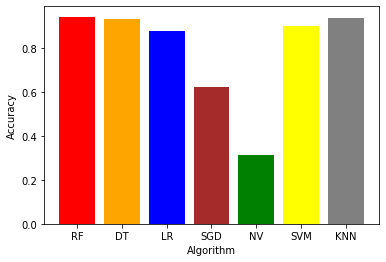

In [54]:
import matplotlib.pyplot as plt 
algorithms = ["RF","DT","LR","SGD","NV","SVM","KNN"] 
plt.bar(algorithms,accuracies,color={"red","green","blue","yellow","grey","brown","orange"})
#plt.title("Accuracy for each algorithm")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.show()

In [51]:
from sklearn.metrics import precision_recall_fscore_support,precision_score,recall_score,f1_score

In [52]:
precision_score(y_test, y_pred)

0.7741935483870968

In [53]:
recall_score(y_test, y_pred)

0.47058823529411764

In [ ]:
f1_score(y_test, y_pred)